Sentiment analysis has been using as a tool to cassify response from your user/customer as 'positive' or 'negative' or even 'neutral'.

Before use of sentiment analysis algorithms, people were trying to evaluate those user response based on simple practices like : extracting keywords from the content and restricting their findings only on 'what people are talking about?'.
This will never helps you out to answer few important questions 'What people are feeling and thinking about your product?'. That means only the explicit statements/reviews or opinions will have measurable output with your old approach. What would you do with large number of implicit comments?

Even though, it is extremely arduous to determine the actual tone from given text, we can try to develop a more accurate version of our older one.

In the following blog, I am going to help you to understand the basic norms natural language processing in order solve the problem of sentiment analysis. I have divided the whole content into following sub-topics:
		1. Problem Statement
		2. Problem Analysis
		2. Data Collection
		3. Model Development
		4. Analysis

####  Problem Statement:

Though there are lots of challenges out there that can be solved using data science, I come up with a very basic problem. Why I am choosing this -- simply because I do not want to waste my energy just by thinking about big problems and also not to waste your energy to read it and forget in couple of hours :). 

PROBLEM: We have to classify the sentiment of news titles (Whether positive or negative.)

#### Problem Analysis:

For this part, you should be able to answer following questions:
	   1. What will be the input for your program?
	   2. What output you are expecting ?
          Whether it is continous value (something like given by regression model?) or   it is a label value (like spam or ham?)
	   3. What sort of problem is this?
          Whether it is supervised or unsupervised learning? Is it a problem of classification or  clustering ? 
	   4. What are the features you should take into account?

	As we already know, the sentiment of any text can be classified into
    three major categories (positive, negative, and neutral), the problem
    is clearly a type of classification. And, we will be using labelled
    data (supervised learning).

	Your ML model will not be able to predict the correctly if you don't
    have enough training data.

	Suppose, you feed following two texts into your algorithm,

	'New government rule aganist people will' -->Negative
	'Government offers funding opportunities for the startups' -->Positive

	What would you expect if the new input text is

	'Tech Companies in Nepal are having problem to raise funds.
    Nevertheless, they are doing great with customer acquisition'

	Your model is not being taught with this kind of complex structure.


#### Data Collection:

After you have your problem analysis, you should only focus couple of your days to gather the related data.

 a. Training / testing data collection

	I have found labelled data maintained by UCI Machine Learning Repository. The data consists of product reviews and labelled as 1 for positive and 0 for negative responses.

		https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

 b. Unseen data collection
    Unseen data set is collection of documents wihtout label. We will evaluate our final     model based on unseen data.
	In my case, I need to collect news titles from the news portals. I chose our national daily paper ( http://www.ekantipur.com/eng) as a data source.


In [1]:
# Here is the sample code that I have used for scraping news site.
# news_spider.py

# This module scrolls through news site (ekantipur.com) and collects news titles.
import time
import csv

from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

browser = webdriver.Chrome()

browser.get("http://www.ekantipur.com/eng")
time.sleep(1)

elem = browser.find_element_by_tag_name("body")

# set number of pages be scrolled
no_of_pagedowns = 5

# scroll page (handling infinite page scrolling)
while no_of_pagedowns:
    elem.send_keys(Keys.PAGE_DOWN)
    time.sleep(0.2)
    no_of_pagedowns -= 1

content = browser.page_source
soup = BeautifulSoup(content, "html5lib")
browser.close()

news_title_containers = soup.find_all(
    "div", attrs={'class': 'display-news-title'})
with open('news_titles.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for each_container in news_title_containers:
        title_link = each_container.find('a')
        news_title = title_link.string.strip()
        writer.writerow([news_title])


#### Model development

Before starting on model development, you should be familiar with few terms that will help you to understand the process:

i. Training and Testing

This is the process of applying our model on data whose true classes are already known. Once the model is well trained with those data, we need to compute the proportion of the time our classifier will accurately predict the new data. This process is know as testing.

ii. Bias(underfitting) and Variance(overfitting)

Ideally, whenever we try to develop ML model, we try to capture all the features(information) of the training data and also want our model to generalize the output for unseen input data.

<img src="files/final_draw.png">
In the diagram above, the linear model is underfit
 - The model doesn't take care of all the information provided (high bias)
 - If you provide new data to this model, it will not change it's behavior(shape) (low variance)


On the other hand, the model with high degree polynomial at the right is overfit
 - The model will take into account all the data points (low bias)
 - The curve will try to change it's shape in order to capture new data points, loosing the generality of the model (high variance)


iii. Cross Validation:

Most of the time, when we are developing ML model we simply split the data randomly into train and test set and feed into our model. While doing so, we may have a high accuracy on that particular chunk of training data set. What if your model perform differently and give lower accuracy while feeding different chuncks of from the sama data points? So, in cross-validation, we will be creating number of train/test splits and measure the accuracy by calculating average on each of the spits.


iv. Learning Curve
	
  Learning curve helps to measure the performance of your model based on variations on your training data supply.

   Why you need to plot learning curve?
   - You can identify the correct spot on your curve where bias and variance is minimized.

I have divided the whole model development process into following subprocesses:

 #### A. Loading data / Split into training and test set

I have divided the corpus provided by UCI Machine Learning Repository for training and testing as 


In [2]:

TRAIN_CORPUS_FILES = ['amazon.txt', 'imdb.txt']
TEST_CORPUS_FILES = ['yelp.txt']

#### B. Feature Extraction
  i. We need to convert text data into numerical feature vectors
  
  Most of the algorithms expect numerical data rather than raw (a sequence of symbols). This process is called vectorization -- turning text documents into numerical representation. This whole process comprises of - tokenization, counting and normalization of data ( More specifically called prcess of Bag of Words). The document will be represented by the occurrences of words in the document rather than the relative position of them.
  
Let us have a closer look into vectorization

In [4]:
sample_train_data = ['Dispute delays National Assembly formation process',
              'Country is looking to encourage entrepreneurs and startup process',
              'Airline fuel surcharges to go up from Tuesday'] 

from sklearn.feature_extraction.text import CountVectorizer
# instantiate Vectorizer
vec = CountVectorizer()

# feed/learn the 'vocabulary' of the training data
vec.fit(sample_train_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Looking at the definition above, the `CountVectorizer` simply make whole words lowercase, remove duplicates, and remove single word characters as suggested by regex.

In [5]:
# current fitted vocabulary
vec.get_feature_names()

['airline',
 'and',
 'assembly',
 'country',
 'delays',
 'dispute',
 'encourage',
 'entrepreneurs',
 'formation',
 'from',
 'fuel',
 'go',
 'is',
 'looking',
 'national',
 'process',
 'startup',
 'surcharges',
 'to',
 'tuesday',
 'up']

Let us create a document-term matrix. This simply describes the occurence of terms collection of documents.

In [6]:
# transform training data into a 'document-term matrix'
sample_train_dtm = vec.transform(sample_train_data)
sample_train_dtm

<3x21 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>

Looking at the output, we can see that it creates a matrix with 3 rows and 21 columns.
 - Here, 3 colums because we have three documents all together
 - And, 21 rows because we have 21 terms (learned during fitting step above)

In [7]:
# let's observe the dense matrix
sample_train_dtm.toarray()

array([[0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1]])

In [8]:
# Let us see the complete data map using pandas
import pandas as pd
pd.DataFrame(sample_train_dtm.toarray(), columns=vec.get_feature_names())

,airline,and,assembly,country,delays,dispute,encourage,entrepreneurs,formation,from,...,go,is,looking,national,process,startup,surcharges,to,tuesday,up
0,0,0,1,0,1,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1,0,1,0,1,0,0,1,1,0,0,...,0,1,1,0,1,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,1,1


You can see that most of the feature values are `ZEROs`. Why is that? Because most of the documents can be represented by small sets of words. Suppose, you have collected almost 100 reviews (documents) from a site. Then, there could be all together 1000 unique words (corpus) and a single review (single document) might have 10 unique words. right?

Storing such a big number of `ZEROs` does not make sense. So, scikit-learn internally uses `scipy.sparse` package to store such a matrix in memory and it also speed up the operations.

In [9]:
# let us now test our model with new example 
sample_test_data = ['Country is looking to encourage agriculture schemes']

In [10]:
# transform testing data into a document-term matrix (using existing vocabulary)
sample_test_dtm = vec.transform(sample_test_data)
sample_test_dtm.toarray()

array([[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0]])

In [11]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(sample_test_dtm.toarray(), columns=vec.get_feature_names())

,airline,and,assembly,country,delays,dispute,encourage,entrepreneurs,formation,from,...,go,is,looking,national,process,startup,surcharges,to,tuesday,up
0,0,0,0,1,0,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0


You can see that `agriculture` and  `schemes` are not the part of output. For our model, to make prediction about this new observation, this new data must have the same features as the training observations. We did not train on the features "`agriculture` and  `schemes`" so our model would not be able to predict. Make any sense ?

##### Problem with `CountVectorizer` **

If are looking at two different documents talking about same topic, one bit longer than
other, you will find the average count values in the longer one will be higher than
the shorter document. That means, `CountVectorizer` simply gives equal weightage to each
of the word present in your document (one word represents one column in DataFrame). And,
when you have new document, it simply maps 1 if the word is present in that document
otherwise map to 0.

So as to avoid this problem, we can use `TfidfTransformer` which evaluates frequencies of 
words rather than their occurences in the document and helps model to figure out which of
the word is more important in the document and also with respect to the corpus.


#### Let's  take a closer look at `Tfidf`

Suppose you have a corpus of documents talking about `Mountains`. Now, `Tfidf` will work in three different parts

#### i. Term Frequency (Tf)
  It simply looks for the number of times a particular term occurs in your single document.
  Let's take an example. You can find word `is` in almost all of your documents. Do you think the word `is` has any credit to describe your document ? But, at the same time, if you find word `Everest` in the document, you can figure out that the document is about `Mountains`.
 So, we need to find a way to reduce the weightage of word `is`. One of the method is calculating reciprocal of the count value, which minimizes the significant of word `is` in the document. But, you might face another problem here. Suppose, you encounter a word in your document (let's say `stratovolcano` having rare occurence in your document). If you take reciprocal of this occurence, you will get 1 (or close to 1 - hightest weightage). But, this word does not give much sense about `Montains`.
 
For now, we can keep the word count as follows:

    `tf("is") = 1000`
    `tf("Everest") = 50`
    `tf("stratovolcano") = 2`


#### ii. Inverser Document Frequency (iDF)

  The problem of occurence of rare and more frequent words will be handled by this method.
   Inverser Document Frequency gives downscale weights for words that occur in many documents in the corpus by taking log of number of total documents in your corpus divided by the total number of documents having occurence of the word.
   i.e iDF = log (total number of documents/ total documents with word occurence)
   
   Let's calculate iDF for above words. (Suppose we have total 20 documents)
   
    `iDF("is") = log(20/20) = 0` , Since 'is' occurs in all the documents
    `iDF("Everest") = log(20/5) = 0.6`,  Since corpus is talking about 'Mountains'
    `iDF("stratovolcano") = log(10/1) = 1 `, Since `stratovolcano` occurs in one doc.
   
#### iii. TfiDF
    
    TfiDF = TF * iDF
    
    Therefore,
        `TfiDF("is") = 1000 * 0 = 0`
        `TfiDF("Everest") = 50 * 0.6 = 30`
        `TfiDF("stratovolcano") = 2 * 1 = 2`
    
   

Let's calcuate TfiDF for our sample train data above.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()
sample_train_tfidf = tfidf_vec.fit_transform(sample_train_data)

In [13]:
pd.DataFrame(sample_train_tfidf.toarray(), columns=tfidf_vec.get_feature_names())

,airline,and,assembly,country,delays,dispute,encourage,entrepreneurs,formation,from,...,go,is,looking,national,process,startup,surcharges,to,tuesday,up
0,0.000000,0.000000,0.423394,0.000000,0.423394,0.423394,0.000000,0.000000,0.423394,0.000000,...,0.000000,0.000000,0.000000,0.423394,0.322002,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.350139,0.000000,0.350139,0.000000,0.000000,0.350139,0.350139,0.000000,0.000000,...,0.000000,0.350139,0.350139,0.000000,0.266290,0.350139,0.000000,0.266290,0.000000,0.000000
2,0.363255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363255,...,0.363255,0.000000,0.000000,0.000000,0.000000,0.000000,0.363255,0.276265,0.363255,0.363255


### C. Choose estimator

I will be using `SVM` as my estimator. We will not talk details on SVM because it might take long hours to understand the algorithms.
In brief, `linear SVM` tries to find an optimal vector ( a line) sperating two data points i.e classifying data. 


In [1]:
# news_classifier.py
import pickle
import csv
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

TRAIN_CORPUS_FILES = ['amazon.txt', 'imdb.txt']
TEST_CORPUS_FILES = ['yelp.txt']

class NewsClassification:
    def __init__(self):
        self.train_data = []
        self.train_labels = []
        self.test_data = []
        self.test_labels = []

        self.train_vectors = None
        self.test_vectors = None
        self.vectorizer = TfidfVectorizer()
        self.model = None

    def read_news_corpus(self, file):
        with open('news_corpus/%s' % (file), 'r') as f:
            return f.readlines()

    def prepare_data(self, prepared_for='training'):
        data = []
        labels = []
        if prepared_for.strip().lower() == 'training':
            CORPUS_FILES = TRAIN_CORPUS_FILES
        else:
            CORPUS_FILES = TEST_CORPUS_FILES

        for train_file in CORPUS_FILES:
            rows = self.read_news_corpus(train_file)
            for row in rows:
                line = row.strip().rsplit('\t', 1)
                try:
                    text = line[0]
                    label = line[1].replace('\t', '').strip()
                    data.append(text)
                    labels.append(label)
                except Exception:
                    pass
        return data, labels

    def prepare_feature_vectors(self):
        # Train the feature vectors
        self.train_vectors = self.vectorizer.fit_transform(self.train_data)
        # Apply model on test data
        # : since they have already been fit to the training set
        self.test_vectors = self.vectorizer.transform(self.test_data)

    def prepare_model(self, classifier_type='svm', kernel='linear'):
        self.model = svm.SVC(kernel=kernel)
        self.model.fit(self.train_vectors, self.train_labels)

        # let's save our model using pickle.
        # we will using this model later for unseen data as well.
        data_struct = {'vectorizer': self.vectorizer, 'model': self.model}
        with open('%s.bin' % kernel, 'wb') as f:
            pickle.dump(data_struct, f)


if __name__ == '__main__':
    news_classifier = NewsClassification()
    news_classifier.train_data, news_classifier.train_labels =\
        news_classifier.prepare_data()
    news_classifier.test_data, news_classifier.test_labels =\
        news_classifier.prepare_data('testing')

    news_classifier.prepare_feature_vectors()
    news_classifier.prepare_model(kernel='linear')
    

#### D. Prediction with test data

In [3]:
# let's run prediction with our test data
prediction = news_classifier.model.predict(news_classifier.test_vectors)

# create a list of final data
with open('news_corpus/yelp.txt', 'r') as f:
        test_data = f.readlines()
        test_data = [row.replace('\n', '') for row in test_data]
        reader = csv.reader(test_data, delimiter='\t')
        final_data = []
        for row, predicted_value in zip(reader, prediction):
            row.append(predicted_value)
            final_data.append(row)
df = pd.DataFrame.from_records(
    final_data,
    columns=['title', 'actual_prediction', 'predicted_value'])
print(df.head(15).to_string())

                                                title actual_prediction predicted_value
0                            Wow... Loved this place.                 1               1
1                                  Crust is not good.                 0               0
2           Not tasty and the texture was just nasty.                 0               0
3   Stopped by during the late May bank holiday of...                 1               1
4   The selection on the menu was great and so wer...                 1               1
5      Now I am getting angry and I want my damn pho.                 0               1
6               Honeslty it didn't taste THAT fresh.)                 0               0
7   The potatoes were like rubber and you could te...                 0               0
8                           The fries were great too.                 1               1
9                                      A great touch.                 1               1
10                           Ser

#### F. Prediction of unseen data

In [4]:
# let's run our model against news titles that we scraped before
with open('linear.bin', 'rb') as model_file, open('news_titles.csv', 'r') as data_file:
        data_struct = pickle.load(model_file)
        vectorizer, model = data_struct['vectorizer'], data_struct['model']

        reader = data_file.readlines()
        data = [row.replace('\n', '') for row in reader]

        # vectorize the raw data
        new_data_vectors = vectorizer.transform(data)
        predictions = model.predict(new_data_vectors)

values = pd.Series(['positive' if prediction ==
                    '1' else 'negative' for prediction in predictions])
output = pd.DataFrame()
output['title'] = data
output['sentiment'] = values
print(output.to_string())

                                                title sentiment
0   Shooting in Brazil kills at least 14 in dance ...  negative
1   Prez calls for action to harness Nepal’s huge ...  negative
2                MaHa’s Satru Gate in post-production  negative
3   Kathakanksha 2 culminates in a dance extravaganza  positive
4   Itahari Gold Cup: Three Star lift first title ...  negative
5                      "NCS, GHCA register easy wins"  positive
6            Forward Gharti Magar to join Mohun Bagan  negative
7               Nepse index posts loss of 1.99 points  positive
8   India drags feet in building new cross-border ...  positive
9               Politicians flout rules to build road  negative
10  Expansion Plan: Kaligandaki road corridor set ...  negative
11                                  His secret garden  positive
12                              Rising from the ashes  negative
13                                        Karnali 2.0  negative
14                                  The 

#### D. Model Evaluation

##### i. Accuracy
  - It measures percentage of correct predictions .i.e the number of correct predictions
 made by our model divided by the total number of predictions.

In [6]:
from sklearn import metrics
print(metrics.accuracy_score(news_classifier.test_labels, prediction))


0.778


##### ii. Confusion Matrix
  - This matrix helps you to understand the types of errors made by our classifier.

In [7]:
conf_mat = metrics.confusion_matrix(news_classifier.test_labels, prediction)
print(conf_mat)

[[406  94]
 [128 372]]


* Here, we have 222 (128+94) misclassified data out of 1000.

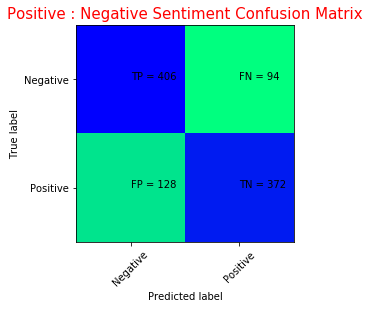

In [16]:
# Let's plot the matrix so that it will be more easier to see the model performance
import matplotlib.pyplot as plt
import numpy as np

plt.clf()
img = plt.imshow(conf_mat, interpolation='nearest')
img.set_cmap('winter_r')
class_names = ['Negative', 'Positive']
plt.title('Positive : Negative Sentiment Confusion Matrix', fontsize="15", color="red")
plt.ylabel('True label')
plt.xlabel('Predicted label')

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
conf_labels = [['TP', 'FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_labels[i][j]) + " = " + str(conf_mat[i][j]))
plt.show()




 - TP (140) : sentiments our model thinks are "positive" and are "positive" in reality.
 - FN (94) : sentiments our model thinks are "negative" but they are "positive" in reality.
 - FP (128) : sentiments our model thinks are "positive" but they are "negative" in reality.
 - TN (372) : sentiments our model thinks are "negative" and are "negative" in reality.


#### Recall
##### -  There are total 500 (406 + 94) positive labels. And, our model is successfully identified 406 as positive
 i.e recall = 406/500 = 0.812  (TP/(TP+FN))
  -  Recall measures the ability of the classifier to find all the positive data points.
  
#### Precision
##### -  Out of 534 (406 + 128) predicted positive labels, only 406 are real positives.
 i.e precision = 406 /534 = 0.76 (TP/(TP+FP))
  -  Precision measures the ability of the classifier not to mark a negative data point  as positive.